## Backtesting com Pyfolio

Backtest é o teste de um modelo de predição utilizando dados históricos.

No mercado financeiro, e mais especificamente em algotrading, backtesting se refere ao teste de uma estratégia de investimento utilizando dados passados do mercado, e seu objetivo é estimar como essa estratégia teria se comportado em um determinado período do passado.

Importando Bibliotecas

In [1]:
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import yfinance as yf
import warnings 
import pyfolio as pf
import empyrical

Melhorando a qualidade da coleta de dados

In [3]:
yf.pdr_override()
warnings.filterwarnings('ignore')

Coletando os dados

In [4]:
tickers = []
num = int(input("Quantas ações tem a sua carteira: "))
for i in range(0, num):
    ac = input("Digite o codigo da ação: ").upper()
    ac += '.SA'
    tickers.append(ac)

In [5]:
tickers.append('^BVSP')
tickers

['ABEV3.SA',
 'B3SA3.SA',
 'BBAS3.SA',
 'BBDC4.SA',
 'CSAN3.SA',
 'CYRE3.SA',
 'GGBR4.SA',
 'PETR4.SA',
 'VALE3.SA',
 'VVAR3.SA',
 '^BVSP']

In [6]:
dados_yahoo = web.get_data_yahoo(tickers, period="5y")["Adj Close"]

[*********************100%***********************]  11 of 11 completed


Previa dos dados

In [7]:
dados_yahoo

,ABEV3.SA,B3SA3.SA,BBAS3.SA,BBDC4.SA,CSAN3.SA,CYRE3.SA,GGBR4.SA,PETR4.SA,VALE3.SA,VVAR3.SA,^BVSP
Date,,,,,,,,,,,
2016-01-11,14.875612,9.088242,10.858643,8.689064,19.475243,5.770221,3.534493,5.649709,8.759892,1.093586,39950.0
2016-01-12,15.034992,9.027651,10.481996,8.639421,18.436672,5.808741,3.431637,5.130196,8.049861,1.073703,39514.0
2016-01-13,14.902176,9.010341,10.289664,8.515521,19.109667,5.847260,3.207225,4.888993,7.699123,1.073703,38944.0
2016-01-14,14.919887,9.200761,10.866657,8.773298,19.209370,5.739406,3.300730,5.278628,8.255171,1.183061,39500.0
2016-01-15,14.689666,9.010341,10.449942,8.550201,18.943495,5.585328,3.225926,4.796223,8.015641,1.173120,38569.0
...,...,...,...,...,...,...,...,...,...,...,...
2021-01-04,15.480000,60.980000,37.590000,26.411026,79.239998,28.500000,26.040001,28.910000,91.459999,16.170000,118558.0
2021-01-05,15.810000,61.099998,37.200001,26.250000,79.489998,27.950001,26.670000,30.040001,93.000000,16.219999,119223.0
2021-01-06,16.129999,60.099998,38.049999,27.120001,79.300003,27.230000,27.950001,30.100000,96.050003,15.490000,119851.0


Criando tabela com o retorno diario dos ativos

In [8]:
retorno = dados_yahoo.pct_change()

In [9]:
retorno

,ABEV3.SA,B3SA3.SA,BBAS3.SA,BBDC4.SA,CSAN3.SA,CYRE3.SA,GGBR4.SA,PETR4.SA,VALE3.SA,VVAR3.SA,^BVSP
Date,,,,,,,,,,,
2016-01-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-12,0.010714,-0.006667,-0.034686,-0.005713,-0.053328,0.006676,-0.029101,-0.091954,-0.081055,-0.018182,-0.010914
2016-01-13,-0.008834,-0.001917,-0.018349,-0.014341,0.036503,0.006631,-0.065395,-0.047016,-0.043571,0.000000,-0.014425
2016-01-14,0.001188,0.021134,0.056075,0.030271,0.005217,-0.018445,0.029155,0.079696,0.072222,0.101852,0.014277
2016-01-15,-0.015430,-0.020696,-0.038348,-0.025429,-0.013841,-0.026846,-0.022663,-0.091388,-0.029016,-0.008403,-0.023570
...,...,...,...,...,...,...,...,...,...,...,...
2021-01-04,-0.010863,-0.007206,-0.031186,-0.026161,0.046349,-0.033243,0.065031,0.020113,0.045855,0.000619,-0.006270
2021-01-05,0.021318,0.001968,-0.010375,-0.006097,0.003155,-0.019298,0.024194,0.039087,0.016838,0.003092,0.005609
2021-01-06,0.020240,-0.016367,0.022849,0.033143,-0.002390,-0.025760,0.047994,0.001997,0.032796,-0.045006,0.005267


Criando tabela com retorno acumulado dos ativos

In [10]:
retorno_acumulado = (1+retorno).cumprod()
retorno_acumulado.iloc[0] = 1

In [11]:
retorno_acumulado

,ABEV3.SA,B3SA3.SA,BBAS3.SA,BBDC4.SA,CSAN3.SA,CYRE3.SA,GGBR4.SA,PETR4.SA,VALE3.SA,VVAR3.SA,^BVSP
Date,,,,,,,,,,,
2016-01-11,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2016-01-12,1.010714,0.993333,0.965314,0.994287,0.946672,1.006676,0.970899,0.908046,0.918945,0.981818,0.989086
2016-01-13,1.001786,0.991428,0.947601,0.980027,0.981229,1.013351,0.907407,0.865353,0.878906,0.981818,0.974819
2016-01-14,1.002976,1.012381,1.000738,1.009694,0.986348,0.994660,0.933862,0.934319,0.942383,1.081818,0.988736
2016-01-15,0.987500,0.991428,0.962362,0.984019,0.972696,0.967957,0.912698,0.848933,0.915039,1.072727,0.965432
...,...,...,...,...,...,...,...,...,...,...,...
2021-01-04,1.040629,6.709769,3.461759,3.039571,4.068755,4.939152,7.367394,5.117077,10.440768,14.786213,2.967660
2021-01-05,1.062813,6.722973,3.425843,3.021039,4.081592,4.843836,7.545637,5.317088,10.616570,14.831933,2.984305
2021-01-06,1.084325,6.612940,3.504121,3.121165,4.071836,4.719057,7.907782,5.327708,10.964748,14.164405,3.000025


Definindo a tabela da carteira

In [12]:
carteira = 10000 * retorno_acumulado

Criando colunas na tabela carteira

In [13]:
carteira["Saldo"] = carteira.sum(axis=1)
carteira["Retorno"] = carteira["Saldo"].pct_change()

In [14]:
carteira

,ABEV3.SA,B3SA3.SA,BBAS3.SA,BBDC4.SA,CSAN3.SA,CYRE3.SA,GGBR4.SA,PETR4.SA,VALE3.SA,VVAR3.SA,^BVSP,Saldo,Retorno
Date,,,,,,,,,,,,,
2016-01-11,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,110000.000000,NaN
2016-01-12,10107.141781,9933.330619,9653.136207,9942.866670,9466.722739,10066.757127,9708.994520,9080.459566,9189.452798,9818.180669,9890.863579,106857.906274,-0.028564
2016-01-13,10017.857177,9914.283873,9476.013410,9800.274258,9812.286913,10133.511775,9074.072675,8653.530773,8789.062483,9818.180669,9748.185232,105237.259238,-0.015166
2016-01-14,10029.763031,10123.807519,10007.380922,10096.942821,9863.481570,9946.597108,9338.623725,9343.185043,9423.827695,10818.180996,9887.359199,108879.149627,0.034606
2016-01-15,9874.999118,9914.283873,9623.616912,9840.186918,9726.962160,9679.573557,9126.984234,8489.326611,9150.388682,10727.270785,9654.317897,105807.910748,-0.028208
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-04,10406.294056,67097.687737,34617.586758,30395.708815,40687.553645,49391.524523,73673.936092,51170.774809,104407.684707,147862.127544,29676.595745,639387.474432,0.011967
2021-01-05,10628.134254,67229.725305,34258.426406,30210.388509,40815.921751,48438.356074,75456.367593,53170.879634,106165.698392,148319.331844,29843.053817,644536.283579,0.008053
2021-01-06,10843.250604,66129.402442,35041.211609,31211.648065,40718.364654,47190.568076,79077.822488,53277.078845,109647.480157,141644.051392,30000.250313,644781.128644,0.000380


Analise da Carteira

Start date,2016-01-11
End date,2021-01-08
Total months,59
,Backtest
Annual return,44.1%
Cumulative returns,506.3%
Annual volatility,35.3%
Sharpe ratio,1.22
Calmar ratio,0.80
Stability,0.88
Max drawdown,-55.2%


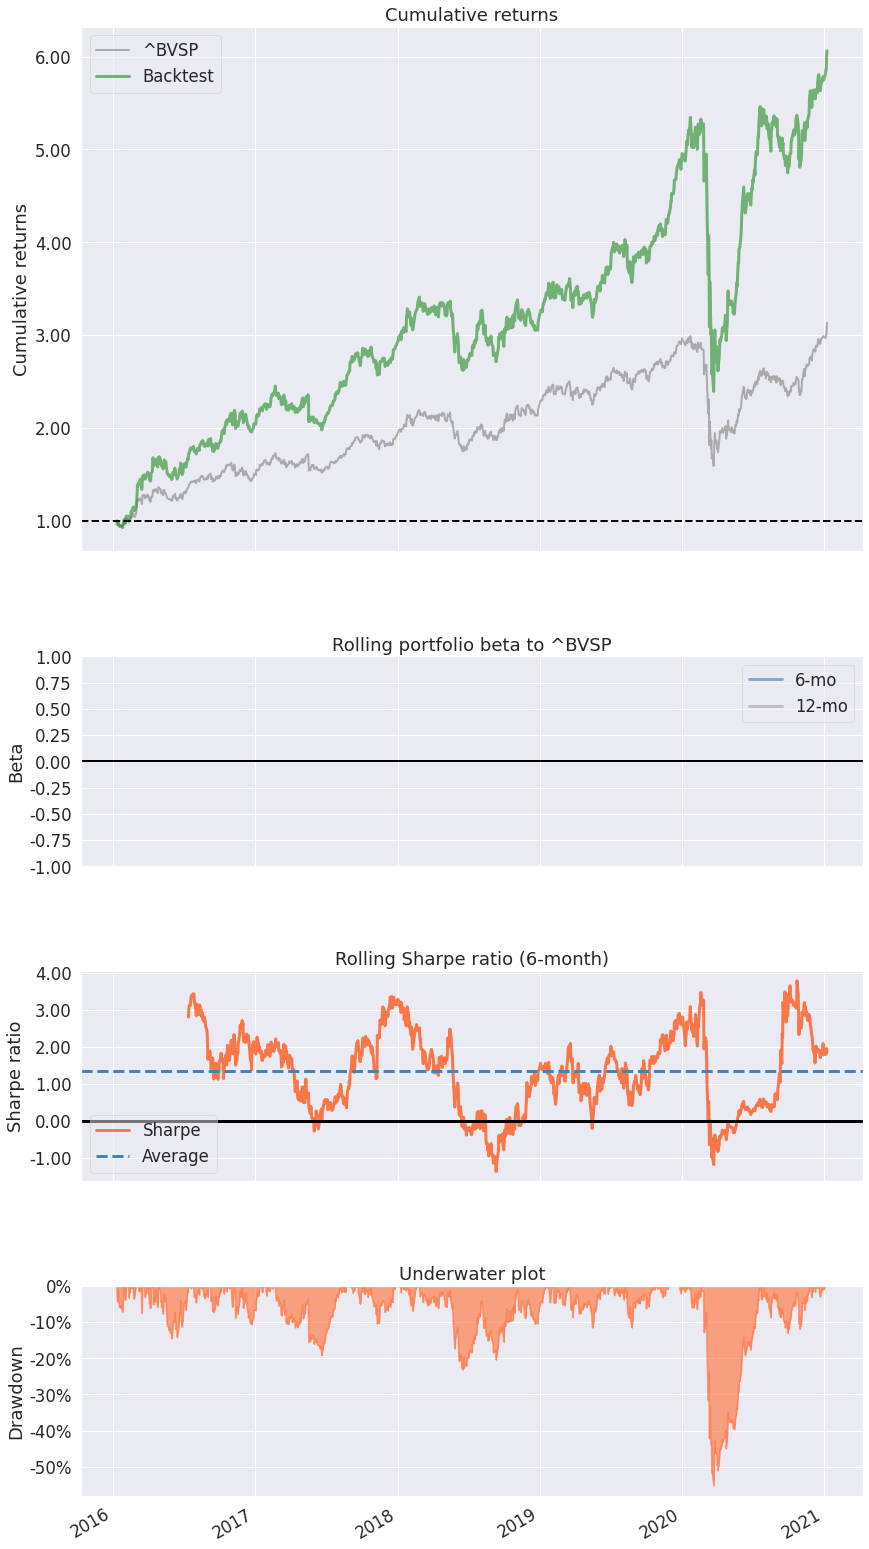

In [15]:
pf.create_simple_tear_sheet(carteira["Retorno"], benchmark_rets = retorno["^BVSP"])

Stress Events,mean,min,max
New Normal,0.17%,-17.92%,15.80%


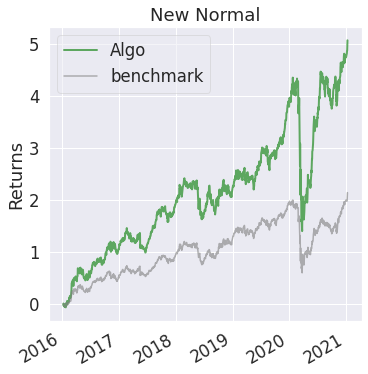

In [16]:
pf.create_interesting_times_tear_sheet(carteira["Retorno"], benchmark_rets = retorno["^BVSP"])

(0.8, 1.4)

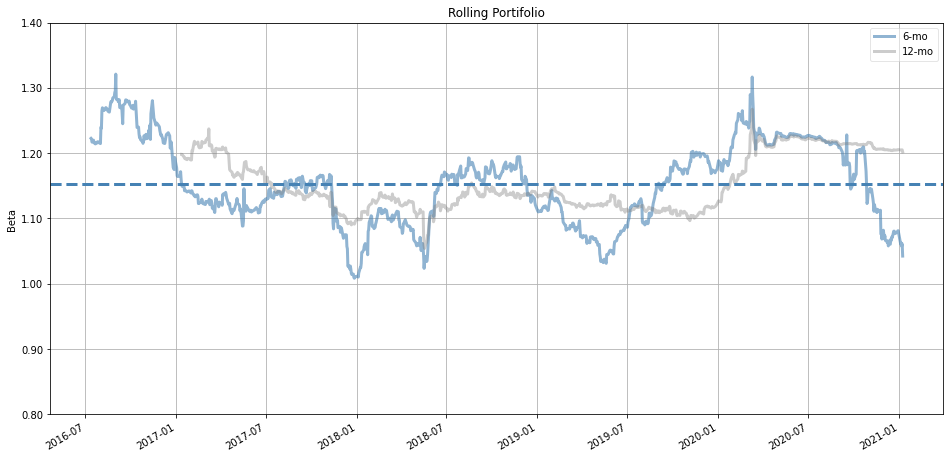

In [17]:
fig, ax1 = plt.subplots(figsize=(16,8))
pf.plot_rolling_beta(carteira["Retorno"], factor_returns=retorno["^BVSP"], ax=ax1)
plt.title("Rolling Portifolio")
plt.grid(True)
plt.ylim((0.8, 1.4))

In [18]:
fig.savefig("graph.png")